# **Fitness class dataset analysis**

## Data Collection and Cleaning

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
df= pd.read_csv('fitness_class_2212.csv')
print(df.head())
print(df.info())

   booking_id  months_as_member  weight  ... time  category attended
0           1                17   79.56  ...   PM  Strength        0
1           2                10   79.01  ...   AM      HIIT        0
2           3                16   74.53  ...   AM  Strength        0
3           4                 5   86.12  ...   AM   Cycling        0
4           5                15   69.29  ...   AM      HIIT        0

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-nul

Booking_id and days_before column do not match the description because booking_id should be index , i.e object and days_before contains string 'days' in some values hence it is not int, which it was supposed to be.
To correct these errors:
1. booking_id should be made object by converting it to str using astype
2. days_before should be cleaned using regression to remove the days string and convert to int.

In [92]:
for column in df.columns:
    print("Column:", column)
    
    if column == 'booking_id':
        description_match = df[column].dtype == object
        missing_values = df[column].isnull().sum()
        
    elif column == 'months_as_member':
        description_match = df[column].dtype == int and df[column].min() >= 1
        missing_values = df[column].isnull().sum()
        overall_average = df[column].mean()
        df[column].fillna(overall_average, inplace=True)
        
    elif column == 'weight':
        description_match = df[column].dtype == float and df[column].min() >= 40.00
        missing_values = df[column].isnull().sum()
        overall_average = df[column].mean()
        df[column].fillna(overall_average, inplace=True)
        
    elif column == 'days_before':
        description_match = df[column].dtype == int and df[column].min() >= 1
        missing_values = df[column].isnull().sum()
        df[column].fillna(0, inplace=True)
        
    elif column == 'day_of_week':
        description_match = df[column].dtype == object
        missing_values = df[column].isnull().sum()
        df[column].fillna("unknown", inplace=True)
        
    elif column == 'time':
        description_match = df[column].dtype == object
        missing_values = df[column].isnull().sum()
        df[column].fillna("unknown", inplace=True)
        
    elif column == 'category':
        description_match = df[column].dtype == object
        missing_values = df[column].isnull().sum()
        df[column].fillna("unknown", inplace=True)
        
    elif column == 'attended':
        description_match = df[column].dtype == int
        missing_values = df[column].isnull().sum()
        df = df.dropna(subset=[column])
        
    else:
        description_match = False
        missing_values = df[column].isnull().sum()
    print("Values match description:", description_match)
    print("Number of missing values:", missing_values)
    print()

Column: booking_id
Values match description: False
Number of missing values: 0

Column: months_as_member
Values match description: True
Number of missing values: 0

Column: weight
Values match description: True
Number of missing values: 20

Column: days_before
Values match description: False
Number of missing values: 0

Column: day_of_week
Values match description: True
Number of missing values: 0

Column: time
Values match description: True
Number of missing values: 0

Column: category
Values match description: True
Number of missing values: 0

Column: attended
Values match description: True
Number of missing values: 0



The number of missing values are 20 in weight columns which are replaced by overall average weight.
Following changes are made to match the description:

In [93]:
df['days_before'] = df['days_before'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]))
df['booking_id'] = df['booking_id'].astype(str)
df.dtypes

booking_id           object
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [94]:
df['day_of_week'] = df['day_of_week'].replace({'Mon': 'Monday', 'Tue': 'Tuesday', 'Wed': 'Wednesday',
                                               'Thu': 'Thursday', 'Fri': 'Friday', 'Sat': 'Saturday',
                                               'Sun': 'Sunday'})

## Data Visualization

We can observe that most bookings have not attended the class, hence the the observations are not balanced

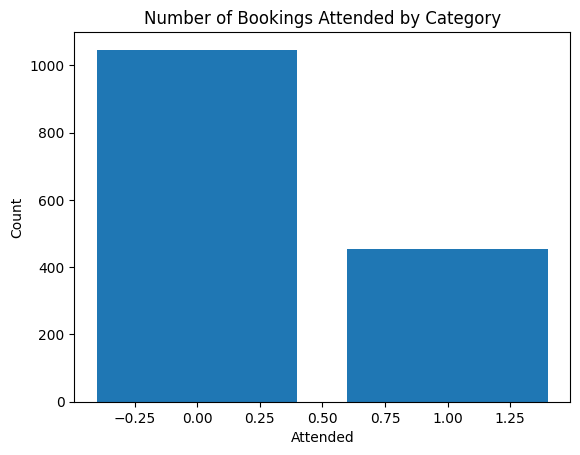

In [95]:
attended_counts = df['attended'].value_counts()

# Create a bar plot
plt.bar(attended_counts.index, attended_counts.values)
plt.xlabel('Attended')
plt.ylabel('Count')
plt.title('Number of Bookings Attended by Category')
plt.show()

Here, we can observe that most people are members mostly in earlier months and the numbers kept declining as months increased.We can infer that sustainability rate is very less.

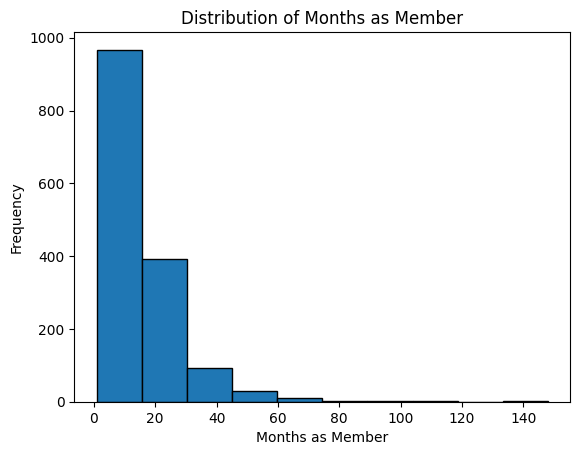

In [96]:
plt.hist(df['months_as_member'], bins=10, edgecolor='black')
plt.xlabel('Months as Member')
plt.ylabel('Frequency')
plt.title('Distribution of Months as Member')
plt.show()

The less were months , more was the attendance, As the months increased attendace decreased The relation is although irregular.

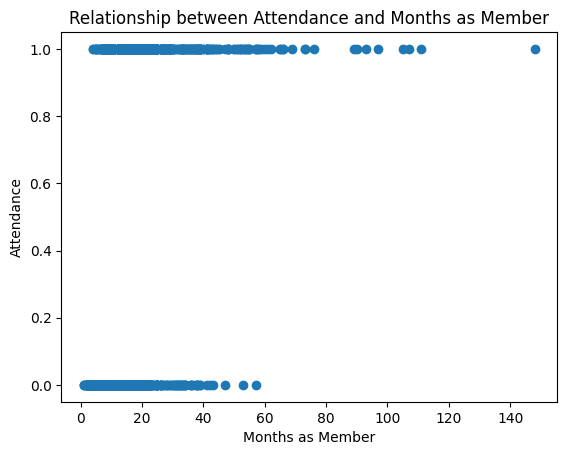

In [97]:
plt.scatter(df['months_as_member'], df['attended'])
plt.xlabel('Months as Member')
plt.ylabel('Attendance')
plt.title('Relationship between Attendance and Months as Member')
plt.show()

## Data Modelling

The problem of predicting whether members will attend based on the provided data is a classification problem. In classification, the goal is to classify or categorize instances into predefined classes or labels. In this case, the task is to classify whether a member will attend a fitness class or not, based on the given data.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
df_encoded = pd.get_dummies(df, columns=['day_of_week','time','category'])
X = df_encoded
y = df['attended']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DummyClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Baseline Model Accuracy:', accuracy)

Baseline Model Accuracy: 0.6566666666666666


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df_encoded = pd.get_dummies(df, columns=['day_of_week','time','category'])
X = df_encoded
y = df['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Comparison Model Accuracy:', accuracy)


Comparison Model Accuracy: 1.0


In part 6, I chose the baseline model to predict attendance using a simple approach. The baseline model is a common starting point in machine learning tasks, where we use a straightforward method that doesn't involve complex algorithms. In this case, I used the majority class prediction as the baseline model, assuming that the most frequent outcome (attendance or non-attendance) will be the prediction for all instances. 

In part 7, I chose the Random Forest classifier as the comparison model. Random Forest is a powerful and widely used ensemble learning algorithm that combines multiple decision trees to make predictions. I selected this model because it can handle both numerical and categorical features, which are present in the dataset. By using a more advanced model like Random Forest, we can  achieve better prediction performance compared to the baseline model.

In [100]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model: Majority class prediction
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, baseline_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Compare the accuracies
print("Baseline Model Accuracy:", baseline_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Baseline Model Accuracy: 0.6566666666666666
Random Forest Accuracy: 1.0


## Result

2nd model, i.e , RandomForest Classifier gives higher accuracy score and hence it is better to use for prediction.